In [67]:
#importing libraries
import sklearn
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression



In [68]:
data = pd.read_csv("C:\\Project\\avocado1.csv")


# Understading the data


In [11]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [31]:
df.tail(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month,Day
18239,2,2018-03-11,1.56,22128.42,2162.67,3194.25,8.93,16762.57,16510.32,252.25,0.0,organic,2018,WestTexNewMexico,2018,03,11
18240,3,2018-03-04,1.54,17393.30,1832.24,1905.57,0.00,13655.49,13401.93,253.56,0.0,organic,2018,WestTexNewMexico,2018,03,04
18241,4,2018-02-25,1.57,18421.24,1974.26,2482.65,0.00,13964.33,13698.27,266.06,0.0,organic,2018,WestTexNewMexico,2018,02,25
18242,5,2018-02-18,1.56,17597.12,1892.05,1928.36,0.00,13776.71,13553.53,223.18,0.0,organic,2018,WestTexNewMexico,2018,02,18
18243,6,2018-02-11,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,organic,2018,WestTexNewMexico,2018,02,11
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2018,02,04
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,2018,01,28
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,2018,01,21
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,2018,01,14
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico,2018,01,07


In [12]:
data.groupby('type').groups

{'conventional': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...], 'organic': [9126, 9127, 9128, 9129, 9130, 9131, 9132, 9133, 9134, 9135, 9136, 9137, 9138, 9139, 9140, 9141, 9142, 9143, 9144, 9145, 9146, 9147, 9148, 9149, 9150, 9151, 9152, 9153, 9154, 9155, 9156, 9157, 9158, 9159, 9160, 9161, 9162, 9163, 9164, 9165, 9166, 9167, 9168, 9169, 9170, 9171, 9172, 9173, 9174, 9175, 9176, 9177, 9178, 9179, 9180, 9181, 9182, 9183, 9184, 9185, 9186, 9187, 9188, 9189, 9190, 9191, 9192, 9193, 9194, 9195, 9196, 9197, 9198, 9199, 9200, 9201, 9202, 9203, 9204, 9205, 9206, 9207, 9208, 9209, 9210, 9211, 9212, 9213, 9214, 9215, 9216, 9217, 9218, 9219, 9220, 9221

In [14]:
regions = data.groupby(data.region)
print("Total regions :", len(regions))
print("-------------")
for name, group in regions:
    print(name, " : ", len(group))

Total regions : 54
-------------
Albany  :  338
Atlanta  :  338
BaltimoreWashington  :  338
Boise  :  338
Boston  :  338
BuffaloRochester  :  338
California  :  338
Charlotte  :  338
Chicago  :  338
CincinnatiDayton  :  338
Columbus  :  338
DallasFtWorth  :  338
Denver  :  338
Detroit  :  338
GrandRapids  :  338
GreatLakes  :  338
HarrisburgScranton  :  338
HartfordSpringfield  :  338
Houston  :  338
Indianapolis  :  338
Jacksonville  :  338
LasVegas  :  338
LosAngeles  :  338
Louisville  :  338
MiamiFtLauderdale  :  338
Midsouth  :  338
Nashville  :  338
NewOrleansMobile  :  338
NewYork  :  338
Northeast  :  338
NorthernNewEngland  :  338
Orlando  :  338
Philadelphia  :  338
PhoenixTucson  :  338
Pittsburgh  :  338
Plains  :  338
Portland  :  338
RaleighGreensboro  :  338
RichmondNorfolk  :  338
Roanoke  :  338
Sacramento  :  338
SanDiego  :  338
SanFrancisco  :  338
Seattle  :  338
SouthCarolina  :  338
SouthCentral  :  338
Southeast  :  338
Spokane  :  338
StLouis  :  338
Syracuse  

In [15]:
df.shape

(18249, 14)

In [16]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [19]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


# Exploring dataset

We will show the avg price of an avocado by date

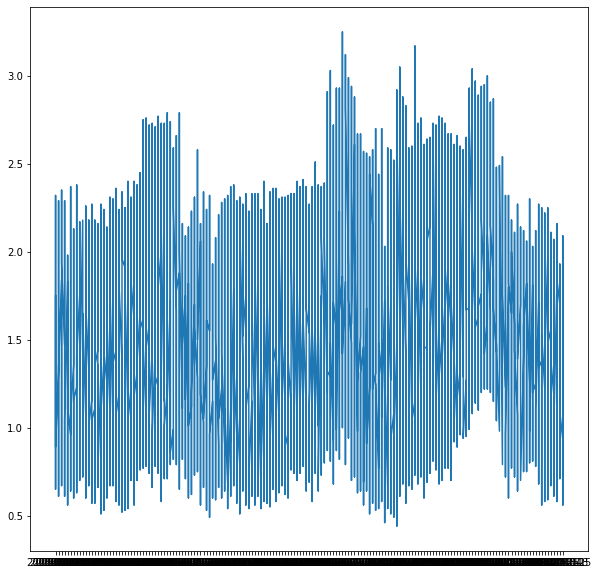

In [34]:
df1 = df.sort_values('Date')
plt.figure(figsize = (10, 10))
plt.plot(df1['Date'], df1['AveragePrice'])

Avegrage price by the density of the avocado

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

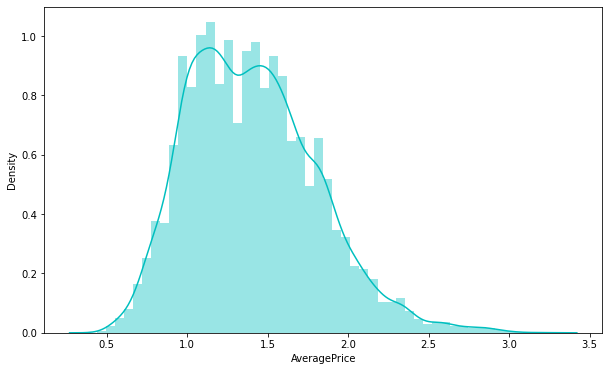

In [39]:
plt.figure(figsize = (10, 6))
sns.distplot(df['AveragePrice'], color = 'c')

The diffrence average price between the two types

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

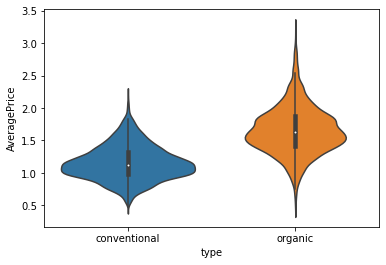

In [40]:
sns.violinplot(y = 'AveragePrice', x = 'type', data =df)

The amount of avocados sold by each year

(array([0, 1, 2, 3]),
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018')])

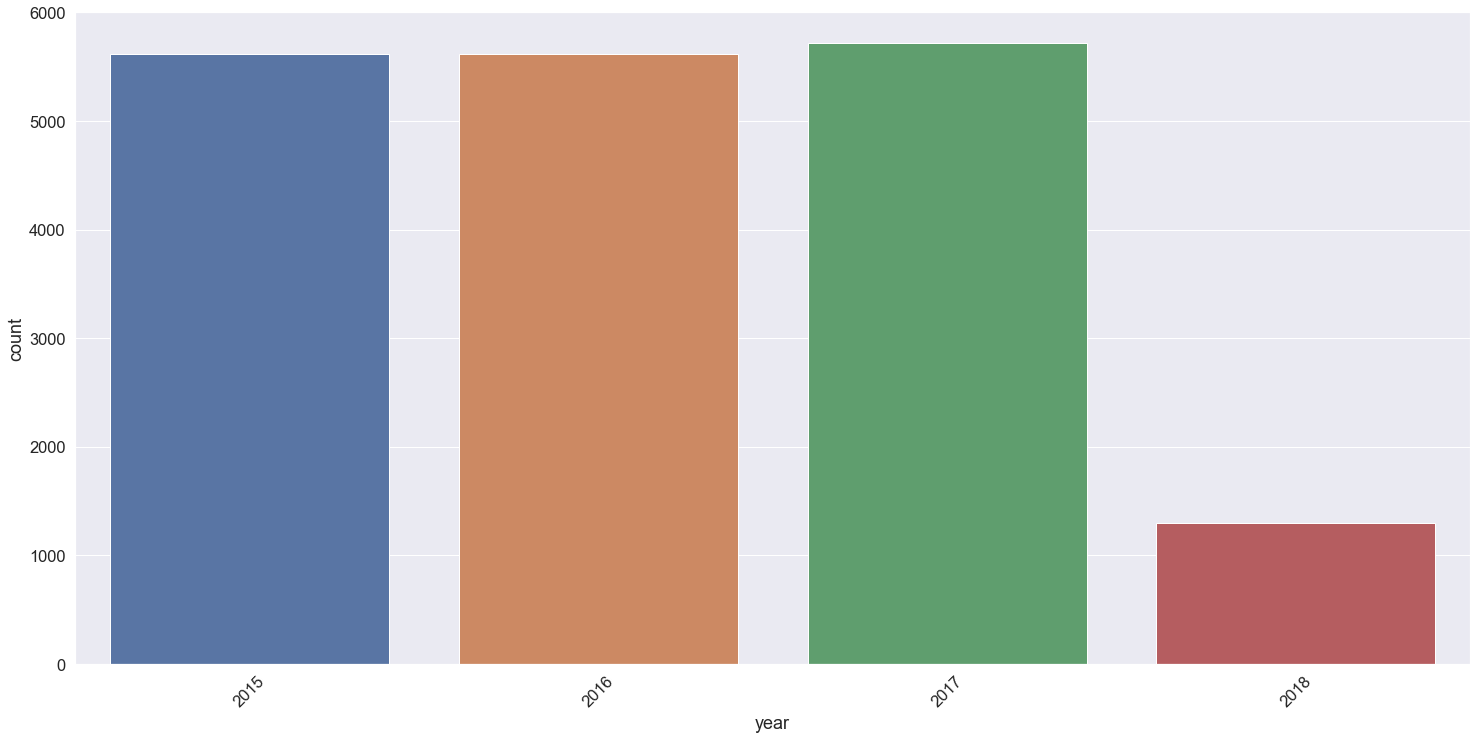

In [42]:
sns.set(font_scale=1.5) 
plt.figure(figsize=[25,12])
sns.countplot(x = 'year', data = df)
plt.xticks(rotation = 45)

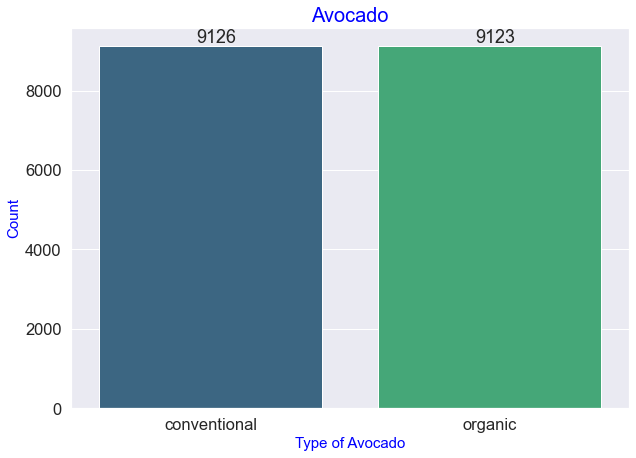

In [47]:
f,ax = plt.subplots(figsize = (10,7))
ax = sns.countplot(x=data.type,label="Count",palette="viridis")
plt.xlabel('Type of Avocado',fontsize = 15,color='blue')
plt.ylabel('Count',fontsize = 15,color='blue')
plt.title('Avocado',fontsize = 20,color='blue')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+75))

Text(44.625, 0.5, 'Average Price')

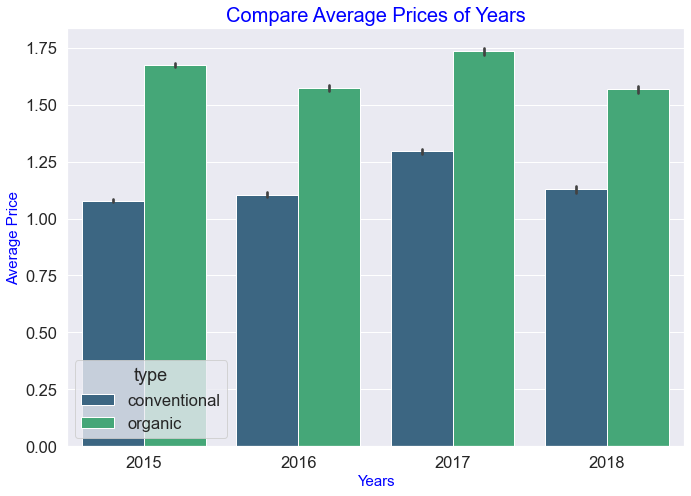

In [48]:
f,ax = plt.subplots(figsize = (10,7))
sns.barplot(x="year", y="AveragePrice",hue="type",data=data,palette="viridis")
plt.tight_layout() 
plt.title("Compare Average Prices of Years",fontsize = 20,color='blue')
plt.xlabel('Years',fontsize = 15,color='blue')
plt.ylabel('Average Price',fontsize = 15,color='blue')

## Corroletion between the data

<AxesSubplot:>

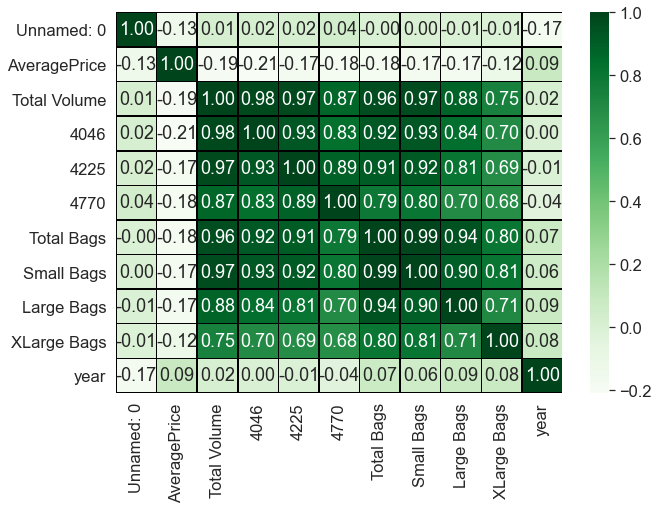

In [49]:
f,ax = plt.subplots(figsize = (10,7))
#data.drop("Unnamed: 0",axis=1,inplace=True)
sns.heatmap(data.corr(), annot=True,cmap = 'Greens', linewidths=0.5,linecolor="black", fmt= '.2f',ax=ax)

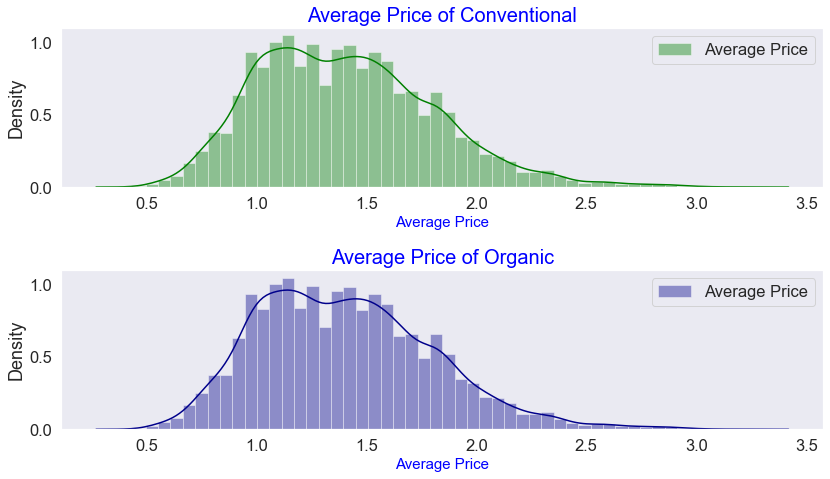

In [52]:
f,ax = plt.subplots(figsize = (12,7))
plt.subplot(2,1,1) 
sns.distplot(df.AveragePrice,color="green",label="Average Price");
plt.title("Average Price of Conventional",fontsize = 20,color='blue')
plt.xlabel('Average Price',fontsize = 15,color='blue')
plt.legend()
plt.grid()

plt.subplot(2,1,2)
sns.distplot(df.AveragePrice,color="darkblue",label="Average Price");
plt.title("Average Price of Organic",fontsize = 20,color='blue')
plt.xlabel('Average Price',fontsize = 15,color='blue')
plt.tight_layout() 
plt.legend()
plt.grid()

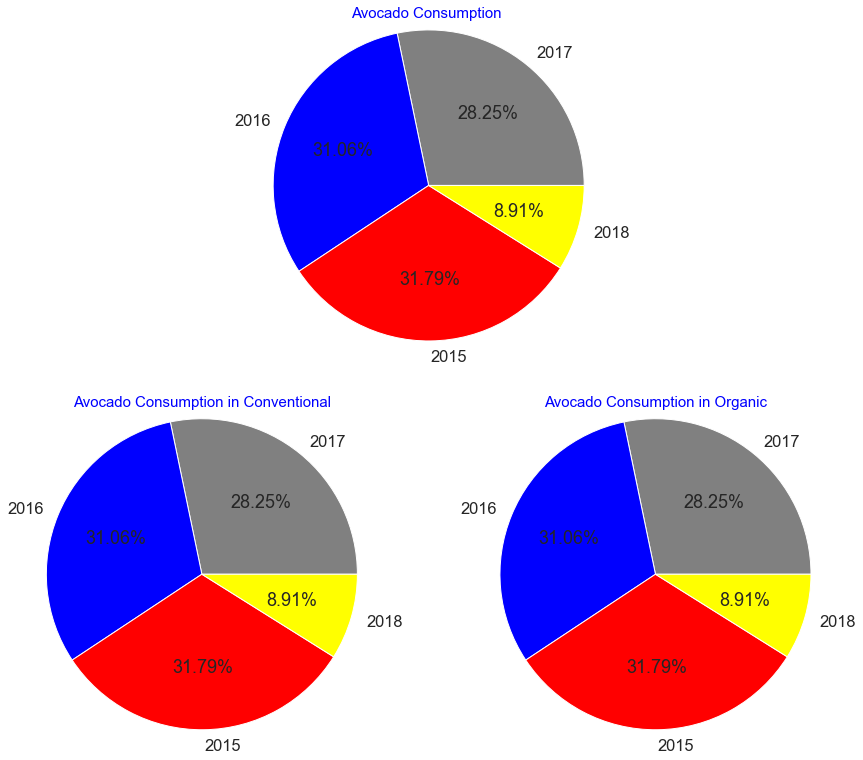

<Figure size 432x288 with 0 Axes>

In [58]:

data_2015 = data[data.year==2015]
sum_2015 = data_2015["Total Volume"].sum()
data_2016 = data[data.year==2016]
sum_2016 = data_2016["Total Volume"].sum()
data_2017 = data[data.year==2017]
sum_2017 = data_2017["Total Volume"].sum()
data_2018 = data[data.year==2018]
sum_2018 = data_2018["Total Volume"].sum()

# Sum(ounce) of Avocados for per year in conventional
data_con_2015 = df[data.year==2015]
sum_con_2015 = data_con_2015["Total Volume"].sum()
data_con_2016 = df[data.year==2016]
sum_con_2016 = data_con_2016["Total Volume"].sum()
data_con_2017 = df[data.year==2017]
sum_con_2017 = data_con_2017["Total Volume"].sum()
data_con_2018 = df[data.year==2018]
sum_con_2018 = data_con_2018["Total Volume"].sum()

# Sum(ounce) of Avocados for per year in organic
data_org_2015 = df[data.year==2015]
sum_org_2015 = data_org_2015["Total Volume"].sum()
data_org_2016 = df[data.year==2016]
sum_org_2016 = data_org_2016["Total Volume"].sum()
data_org_2017 = df[data.year==2017]
sum_org_2017 = data_org_2017["Total Volume"].sum()
data_org_2018 = df[data.year==2018]
sum_org_2018 = data_org_2018["Total Volume"].sum()

labels = data.year.value_counts().index
colors = ['grey','blue','red','yellow']
fracs = [15, 30, 45, 10]
sizes_1 = [sum_con_2015,sum_con_2016,sum_con_2017,sum_con_2018]#for con
fig = plt.figure(figsize = (9,9))
#
sizes_2 = [sum_org_2015,sum_org_2016,sum_org_2017,sum_org_2018]#for org
ax1 = fig.add_axes([0, -0.1, .5, .5], aspect=1)
ax1.pie(sizes_1, labels=labels, radius = 1.2,colors=colors,autopct='%1.2f%%')
#
ax2 = fig.add_axes([0.7, -0.1, .5, .5], aspect=1)
ax2.pie(sizes_2, labels=labels, radius = 1.2,colors=colors,autopct='%1.2f%%')
#
sizes_0 = [sum_2015,sum_2016,sum_2017,sum_2018]
ax3 = fig.add_axes([.35, 0, .5, 1.5], aspect=1)
ax3.pie(sizes_0, labels=labels, radius = 1.2,colors=colors,autopct='%1.2f%%')
#
ax1.set_title('Avocado Consumption in Conventional',color = 'blue',fontsize = 15)
ax2.set_title('Avocado Consumption in Organic',color = 'blue',fontsize = 15)
ax3.set_title('Avocado Consumption ',color = 'blue',fontsize = 15)
plt.show()
plt.tight_layout() # grafikler daha düzgün gözükecek

# Prediction


In [59]:
#seperating the prices to be predicted
y = data.AveragePrice
data.drop(['AveragePrice'], axis=1, inplace=True)


In [60]:
#train-test split
#splitting the data into training and test datasets
from sklearn.model_selection import train_test_split

trainflights, testflights, ytrain, ytest = train_test_split(data, y, train_size=0.7,test_size=0.3, random_state=0)

In [61]:
s = (trainflights.dtypes == 'object')
object_cols = list(s[s].index)

n = (trainflights.dtypes == ('float64','int64'))
numerical_cols = list(n[n].index)

In [62]:
print(object_cols)

['Date', 'type', 'region']


In [63]:
#using One Hot Encoder to make the categorical columns usable

oneHot = OneHotEncoder(handle_unknown = 'ignore', sparse=False)
oneHottrain = pd.DataFrame(oneHot.fit_transform(trainflights[object_cols]))
oneHottest = pd.DataFrame(oneHot.transform(testflights[object_cols]))

#reattaching index since OneHotEncoder removes them:
oneHottrain.index = trainflights.index
oneHottest.index = testflights.index 

#dropping the old categorical columns:
cattraincol = trainflights.drop(object_cols, axis=1)
cattestcol = testflights.drop(object_cols, axis=1)

#concatenating the new columns:
trainflights = pd.concat([cattraincol, oneHottrain], axis=1)
testflights = pd.concat([cattestcol, oneHottest], axis=1)

In [64]:
#scaling the values

trainf = trainflights.values
testf = testflights.values

minmax = MinMaxScaler()

trainflights = minmax.fit_transform(trainf)
testflights = minmax.transform(testf)

#defining a way to find Mean Absolute Percentage Error:
def PercentError(preds, ytest):
  error = abs(preds - ytest)

  errorp = np.mean(100 - 100*(error/ytest))

  print('the accuracy is:', errorp)

In [69]:

model = RandomForestRegressor(n_estimators=100, random_state=0, verbose=1)

model.fit(trainflights, ytrain)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   16.5s finished


RandomForestRegressor(random_state=0, verbose=1)

In [70]:
preds = model.predict(testflights)
PercentError(preds, ytest)

the accuracy is: 93.418345800451


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
